In [2]:
from sklearn.base import BaseEstimator
import numpy as np

In [3]:
class MyDummyClassifier(BaseEstimator):
    def fit(self,x,y):
        pass
    def predict(self,x):
        pred = np.zeros((x.shape[0],1))
        # print(pred)
        for i in range(x.shape[0]):
            if x['Sex'].iloc[i] == 1: #남자일때
                pred[i] = 0 # 사망
            else: #여자일때
                pred[i] = 1 # 생존
        return pred

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],
            inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [6]:
df = pd.read_csv('titanic_train.csv')
y = df['Survived']
x = df.drop(columns='Survived')
x = transform_features(x)
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=11)

In [7]:
myclf = MyDummyClassifier()
myclf.fit(x_train,y_train)
pred = myclf.predict(x_test)
accuracy_score(y_test,pred)

0.8324022346368715

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
confusion_matrix(y_test,pred)

array([[103,  15],
       [ 15,  46]], dtype=int64)

In [10]:
def get_clf_eval(y_test,pred):
    from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f},정밀도:{precision:.4f},재현율:{recall:.4f}')

In [11]:
get_clf_eval(y_test,pred)

오차행렬
[[103  15]
 [ 15  46]]
정확도:0.8324,정밀도:0.7541,재현율:0.7541


In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr_clf = LogisticRegression(max_iter=200)
lr_clf.fit(x_train,y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test,pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도:0.8492,정밀도:0.7742,재현율:0.7869


In [14]:
pred_proba = lr_clf.predict_proba(x_test)
np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)

array([[0.46225822, 0.53774178, 1.        ],
       [0.8787576 , 0.1212424 , 0.        ],
       [0.87718656, 0.12281344, 0.        ],
       [0.88246099, 0.11753901, 0.        ],
       [0.85525789, 0.14474211, 0.        ],
       [0.8821376 , 0.1178624 , 0.        ],
       [0.88849152, 0.11150848, 0.        ],
       [0.20874993, 0.79125007, 1.        ],
       [0.78280989, 0.21719011, 0.        ],
       [0.36908393, 0.63091607, 1.        ],
       [0.89970505, 0.10029495, 0.        ],
       [0.87511886, 0.12488114, 0.        ],
       [0.87718062, 0.12281938, 0.        ],
       [0.88844595, 0.11155405, 0.        ],
       [0.4369463 , 0.5630537 , 1.        ],
       [0.8590793 , 0.1409207 , 0.        ],
       [0.9037593 , 0.0962407 , 0.        ],
       [0.73330718, 0.26669282, 0.        ],
       [0.72472845, 0.27527155, 0.        ],
       [0.1714978 , 0.8285022 , 1.        ],
       [0.75348128, 0.24651872, 0.        ],
       [0.61884699, 0.38115301, 0.        ],
       [0.

In [15]:
from sklearn.preprocessing import Binarizer

In [16]:
x = [[1,-1,2],
     [2,0,0],
     [0,1.1,1.2]]
binarizer = Binarizer(threshold=1.1)
binarizer.fit_transform(x)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [17]:
binarizer = Binarizer(threshold=0.6)
pred_1 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

In [18]:
get_clf_eval(y_test,pred_1)
# 오차행렬
# [[104  14]
#  [ 13  48]]
# 정확도:0.8492,정밀도:0.7742,재현율:0.7869

# 0.4일때
# 오차행렬
# [[98 20]
#  [10 51]]
# 정확도:0.8324,정밀도:0.7183,재현율:0.8361

오차행렬
[[112   6]
 [ 16  45]]
정확도:0.8771,정밀도:0.8824,재현율:0.7377


In [19]:
from sklearn.metrics import precision_recall_curve

In [21]:
pred_proba[:,1]

array([0.53774178, 0.1212424 , 0.12281344, 0.11753901, 0.14474211,
       0.1178624 , 0.11150848, 0.79125007, 0.21719011, 0.63091607,
       0.10029495, 0.12488114, 0.12281938, 0.11155405, 0.5630537 ,
       0.1409207 , 0.0962407 , 0.26669282, 0.27527155, 0.8285022 ,
       0.24651872, 0.38115301, 0.14527832, 0.18537853, 0.11192199,
       0.23461933, 0.14044758, 0.07419243, 0.28051825, 0.30452169,
       0.94718256, 0.81708731, 0.12694667, 0.82624359, 0.39956211,
       0.23461933, 0.07238418, 0.61070295, 0.05288714, 0.10385385,
       0.35127576, 0.08340374, 0.8216047 , 0.70784763, 0.63032261,
       0.63033878, 0.9188424 , 0.35935877, 0.94887436, 0.11195627,
       0.59224411, 0.11155405, 0.1327014 , 0.72543084, 0.30943913,
       0.19714686, 0.22642698, 0.12281448, 0.15409227, 0.43282699,
       0.28022835, 0.10067256, 0.54520026, 0.51491958, 0.44425958,
       0.09454441, 0.66650588, 0.59383912, 0.95180013, 0.14827993,
       0.12876879, 0.16832089, 0.10385608, 0.94796143, 0.19874

In [22]:
y_test

431    1
821    1
629    0
626    0
665    0
      ..
638    0
771    0
521    0
711    0
484    1
Name: Survived, Length: 179, dtype: int64

In [23]:
precision_recall_curve(y_test,pred_proba[:,1])

(array([0.34078212, 0.34269663, 0.34463277, 0.34659091, 0.34857143,
        0.35057471, 0.35260116, 0.35465116, 0.35672515, 0.35882353,
        0.36094675, 0.36309524, 0.36526946, 0.36746988, 0.36969697,
        0.37195122, 0.37423313, 0.37654321, 0.37888199, 0.38125   ,
        0.3836478 , 0.38607595, 0.38853503, 0.38461538, 0.38709677,
        0.38961039, 0.38562092, 0.38815789, 0.39333333, 0.39864865,
        0.41549296, 0.42142857, 0.42446043, 0.42753623, 0.43065693,
        0.43382353, 0.43703704, 0.44029851, 0.43609023, 0.43939394,
        0.44274809, 0.44186047, 0.4453125 , 0.4488189 , 0.45238095,
        0.448     , 0.4516129 , 0.44715447, 0.45081967, 0.45454545,
        0.45833333, 0.46218487, 0.46610169, 0.47008547, 0.47413793,
        0.47826087, 0.48245614, 0.48672566, 0.49107143, 0.5       ,
        0.50458716, 0.50925926, 0.51401869, 0.51886792, 0.52380952,
        0.52884615, 0.53398058, 0.53921569, 0.54455446, 0.55      ,
        0.55555556, 0.56122449, 0.56701031, 0.57

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

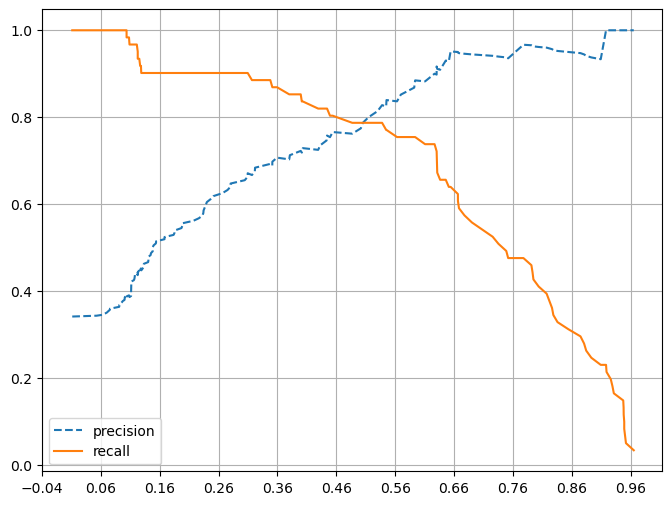

In [30]:
def precision_recall_curve_plot(y_test,pred_proba):
    precisions,recalls,thresholds = precision_recall_curve(y_test,
                                                           pred_proba)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,
             precisions[0:threshold_boundary],
             linestyle='--',
             label='precision')
    plt.plot(thresholds,
             recalls[0:threshold_boundary],
             label='recall')
    start,end = plt.xlim()
    plt.xticks(np.round( np.arange(start,end,0.1) , 2))
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,pred_proba[:,1])

In [31]:
from sklearn.metrics import f1_score

In [32]:
f1_score(y_test,pred)

0.7804878048780488

In [38]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f},정밀도:{precision:.4f},재현율:{recall:.4f},f1:{f1:.4f},AUC:{roc_auc:.4f}')
    
def get_eval_by_threshold(y_test,pred_proba,thresholds):
    from sklearn.preprocessing import Binarizer
    for threshold in thresholds:
        pred = Binarizer(threshold=threshold).fit_transform(pred_proba)
        print('임계값:',threshold)
        get_clf_eval(y_test,pred)        

In [39]:
thresholds = [0.4,0.45,0.5,0.55,0.6]
pred_proba = lr_clf.predict_proba(x_test)[:,1].reshape(-1,1)
get_eval_by_threshold(y_test,pred_proba,thresholds)

임계값: 0.4
오차행렬
[[98 20]
 [10 51]]
정확도:0.8324,정밀도:0.7183,재현율:0.8361,f1:0.7727
임계값: 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도:0.8492,정밀도:0.7656,재현율:0.8033,f1:0.7840
임계값: 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도:0.8492,정밀도:0.7742,재현율:0.7869,f1:0.7805
임계값: 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도:0.8659,정밀도:0.8364,재현율:0.7541,f1:0.7931
임계값: 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도:0.8771,정밀도:0.8824,재현율:0.7377,f1:0.8036


In [40]:
from sklearn.metrics import roc_curve

In [41]:
roc_curve(y_test,pred_proba)

(array([0.        , 0.        , 0.        , 0.00847458, 0.00847458,
        0.01694915, 0.01694915, 0.02542373, 0.02542373, 0.03389831,
        0.03389831, 0.03389831, 0.04237288, 0.04237288, 0.05084746,
        0.05084746, 0.07627119, 0.07627119, 0.08474576, 0.08474576,
        0.12711864, 0.12711864, 0.13559322, 0.13559322, 0.16101695,
        0.16101695, 0.16949153, 0.16949153, 0.18644068, 0.18644068,
        0.20338983, 0.20338983, 0.22881356, 0.22881356, 0.30508475,
        0.33050847, 0.46610169, 0.48305085, 0.57627119, 0.57627119,
        0.58474576, 0.58474576, 0.61016949, 0.61864407, 0.63559322,
        0.63559322, 0.68644068, 0.70338983, 0.75423729, 0.78813559,
        0.79661017, 0.79661017, 0.81355932, 0.81355932, 1.        ]),
 array([0.        , 0.03278689, 0.2295082 , 0.2295082 , 0.47540984,
        0.47540984, 0.63934426, 0.63934426, 0.6557377 , 0.6557377 ,
        0.68852459, 0.72131148, 0.72131148, 0.73770492, 0.73770492,
        0.75409836, 0.75409836, 0.7704918 , 0.

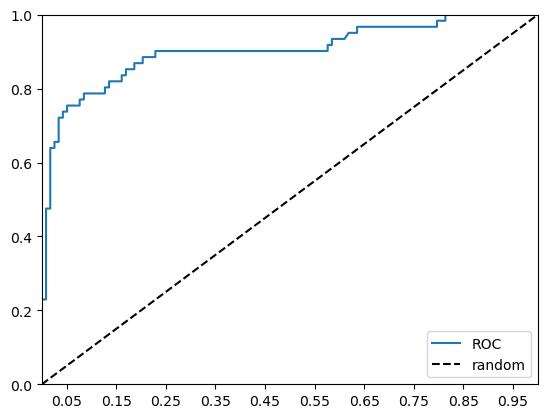

In [47]:
def roc_curve_plot(y_test,pred_proba):
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='random')
    start,end = plt.xlim()
    plt.xticks(np.round( np.arange(start,end,0.1) ,2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test,pred_proba)   